In [1]:
import pandas as pd
import json

# Read the json file
with open("C:/Users/elena/MasterBigData/16_Laboratorio/Python/py_challenge/data/animals.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)
print(df.head())


   walks_on_n_legs    height     weight  has_wings  has_tail
0                2  1.896620  52.244593      False      True
1                2  1.870680  84.608978      False      True
2                4  0.151612   7.855076      False      True
3                2  1.824498  75.800981      False      True
4                4  0.279900  46.757356      False      True


In [2]:
# Convert boolean columns to integers
df["has_wings"] = df["has_wings"].astype(int)
df["has_tail"] = df["has_tail"].astype(int)


In [3]:
from sklearn.preprocessing import StandardScaler

# Scale the features
features = ["walks_on_n_legs", "height", "weight", "has_wings", "has_tail"]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

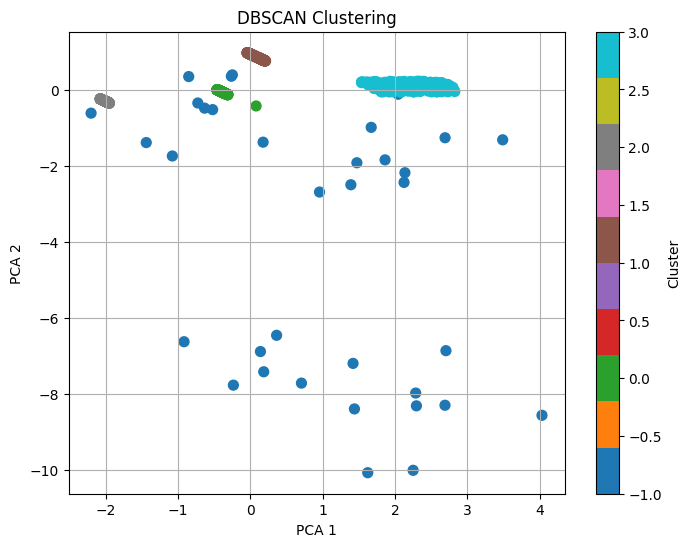

Clusters Distribution:
cluster
 0    246
 1    246
 2    238
 3    235
-1     35
Name: count, dtype: int64


In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)

# Clustering with DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)  
df["cluster"] = dbscan.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["cluster"], cmap="tab10", s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()

print("Clusters Distribution:")
print(df["cluster"].value_counts())


In [5]:
# Print the statistics of each cluster to know the animals in each cluster
for i in sorted(df["cluster"].unique()):
    print(f"--- Cluster {i} ---")
    print(df[df["cluster"] == i].describe())


--- Cluster -1 ---
       walks_on_n_legs     height      weight  has_wings   has_tail  cluster
count        35.000000  35.000000   35.000000  35.000000  35.000000     35.0
mean          2.942857   4.759795  592.467890   0.571429   0.571429     -1.0
std           1.570741   2.957480  304.750575   0.502096   0.502096      0.0
min           1.000000   0.156581    7.194052   0.000000   0.000000     -1.0
25%           1.500000   2.385874  372.705983   0.000000   0.000000     -1.0
50%           3.000000   4.447359  688.203915   1.000000   1.000000     -1.0
75%           4.500000   7.179435  825.491455   1.000000   1.000000     -1.0
max           5.000000   9.839360  998.728175   1.000000   1.000000     -1.0
--- Cluster 0 ---
       walks_on_n_legs      height      weight  has_wings  has_tail  cluster
count            246.0  246.000000  246.000000      246.0     246.0    246.0
mean               2.0    1.806313   67.038339        0.0       1.0      0.0
std                0.0    0.136212   19